# Combining Data from Multiple Sources

In [1059]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## William and Mary Aid Data

In [1060]:
# Reading in cleaned world bank data
world_bank = pd.read_csv('./aid_data/aid_data_wm/world_bank_sums.csv')

In [1061]:
# Reading in cleaned Chinese data 
chinese = pd.read_csv('./aid_data/aid_data_wm/chinese_aid_sums.csv')

In [1062]:
# Checking world bank data
world_bank.head()

,recipients,world_bank_totals
0,Africa,3.875336e+09
1,Algeria,4.380505e+08
2,Angola,8.030873e+08
3,Benin,1.107820e+09
4,Botswana,3.858719e+08


In [1063]:
# Checking Chinese data
chinese.head()

,recipient_condensed,chinese_aid_totals
0,"Africa, regional",1.554420e+10
1,Algeria,5.674971e+08
2,Angola,3.824927e+10
3,Bahrain,2.108542e+07
4,Benin,1.212040e+09


In [1064]:
# Changing recipients to country
world_bank.rename(columns={'recipients': 'country'}, inplace=True)

In [1065]:
# Checking to see if the change stuck 
world_bank.head()

,country,world_bank_totals
0,Africa,3.875336e+09
1,Algeria,4.380505e+08
2,Angola,8.030873e+08
3,Benin,1.107820e+09
4,Botswana,3.858719e+08


In [1066]:
# Looking at the unique country values
world_bank['country'].unique()

array(['Africa', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo', "Cote D'Ivoire",
       'Democratic Republic of Congo', 'Djibouti', 'Eastern Africa',
       'Egypt', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Iran', 'Iraq', 'Jordan', 'Kenya',
       'Lebanon', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'South Africa', 'South Sudan',
       'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Turkey', 'Uganda',
       'Western Africa', 'Yemen', 'Zambia'], dtype=object)

In [1067]:
# Renaming recipients to country 
chinese.rename(columns={'recipient_condensed': 'country'}, inplace=True)

In [1068]:
# Making sure the change stuck 
chinese.head()

,country,chinese_aid_totals
0,"Africa, regional",1.554420e+10
1,Algeria,5.674971e+08
2,Angola,3.824927e+10
3,Bahrain,2.108542e+07
4,Benin,1.212040e+09


In [1069]:
# Looking at the country values
chinese['country'].unique()

array(['Africa, regional', 'Algeria', 'Angola', 'Bahrain', 'Benin',
       'Botswana', 'Burundi', 'Cabo Verde', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo',
       "Cote D'Ivoire", 'Democratic Republic of Congo', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Iraq', 'Israel', 'Jordan',
       'Kenya', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Palestine', 'Rwanda',
       'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Syria', 'Tanzania', 'Togo', 'Tunisia',
       'Turkey', 'Uganda', 'United Arab Emirates', 'Yemen', 'Zambia',
       'Zimbabwe'], dtype=object)

In [1070]:
# Looking the data types and null values 
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
country              58 non-null object
world_bank_totals    58 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [1071]:
# Looking at the data types and null values 
chinese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
country               61 non-null object
chinese_aid_totals    61 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [1072]:
# Merging my two dataframes on country. Doing outer because each has rows I want to keep that aren't in
# the other one. 
aid = pd.merge(world_bank, chinese, how='outer', on=['country'])

In [1073]:
# Checking my combined data frame 
aid.head()

,country,world_bank_totals,chinese_aid_totals
0,Africa,3.875336e+09,NaN
1,Algeria,4.380505e+08,5.674971e+08
2,Angola,8.030873e+08,3.824927e+10
3,Benin,1.107820e+09,1.212040e+09
4,Botswana,3.858719e+08,2.585561e+09


In [1074]:
# Looking at my null values and data types 
aid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 3 columns):
country               69 non-null object
world_bank_totals     58 non-null float64
chinese_aid_totals    61 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.2+ KB


## USAID Data

In [1075]:
# Reading in csv 
usaid = pd.read_csv('./aid_data/usaid/usaid_sums.csv')

In [1076]:
# Looking at USAID data 
usaid.head()

,country_name,usaid_totals
0,Algeria,247662135
1,Angola,2939892764
2,Bahrain,900204738
3,Benin,1785450859
4,Botswana,2141446815


In [1077]:
# Renaming my columns 
usaid.rename(columns={'country_name': 'country', 'usaid_totals': 'usaid_aid'}, inplace=True)

In [1078]:
# Looking at unique country names 
usaid['country'].unique()

array(['Algeria', 'Angola', 'Bahrain', 'Benin', 'Botswana',
       'British Indian Ocean Territory', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo', "Cote D'Ivoire",
       'Democratic Republic of Congo', 'Djibouti',
       'East and South Africa Region', 'Eastern Africa Region',
       'Eastern and Central Africa Region', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kenya',
       'Kuwait', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Middle East Region',
       'Middle East and North Africa Region', 'Morocco', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'North Africa Region', 'Oman',
       'Palestine', 'Qatar', 'Rwanda', 'Sao Tome and Principe',
       'Saudi Arabia', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
       

In [1079]:
# Looking at unique country names 
usaid['country'].unique()

array(['Algeria', 'Angola', 'Bahrain', 'Benin', 'Botswana',
       'British Indian Ocean Territory', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo', "Cote D'Ivoire",
       'Democratic Republic of Congo', 'Djibouti',
       'East and South Africa Region', 'Eastern Africa Region',
       'Eastern and Central Africa Region', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kenya',
       'Kuwait', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Middle East Region',
       'Middle East and North Africa Region', 'Morocco', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'North Africa Region', 'Oman',
       'Palestine', 'Qatar', 'Rwanda', 'Sao Tome and Principe',
       'Saudi Arabia', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
       

In [1080]:
# Merging USAID data with Chinese/World Bank data 
aid = pd.merge(aid, usaid, how='outer', on=['country'])

In [1081]:
# Looking at my new data frame
aid.head()

,country,world_bank_totals,chinese_aid_totals,usaid_aid
0,Africa,3.875336e+09,NaN,NaN
1,Algeria,4.380505e+08,5.674971e+08,2.476621e+08
2,Angola,8.030873e+08,3.824927e+10,2.939893e+09
3,Benin,1.107820e+09,1.212040e+09,1.785451e+09
4,Botswana,3.858719e+08,2.585561e+09,2.141447e+09


In [1082]:
# Looking at the list of unique countries 
aid['country'].unique()

array(['Africa', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo', "Cote D'Ivoire",
       'Democratic Republic of Congo', 'Djibouti', 'Eastern Africa',
       'Egypt', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Iran', 'Iraq', 'Jordan', 'Kenya',
       'Lebanon', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'South Africa', 'South Sudan',
       'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Turkey', 'Uganda',
       'Western Africa', 'Yemen', 'Zambia', 'Africa, regional', 'Bahrain',
       'Equatorial Guinea', 'Israel', 'Libya', 'Palestine', 'Somalia',
       'Sudan', 'Syria', 'United Arab Emirates', 'Zimbabwe',
       'British Indian Ocean Territ

In [1083]:
# Getting rid of the regional values I don't need 
aid = aid.drop(aid.loc[aid['country'] == 'Africa'].index)
aid = aid.drop(aid.loc[aid['country'] == 'Eastern Africa'].index)
aid = aid.drop(aid.loc[aid['country'] == 'Western Africa'].index)
aid = aid.drop(aid.loc[aid['country'] == 'Africa, regional'].index)
aid = aid.drop(aid.loc[aid['country'] == 'British Indian Ocean Territory'].index)
aid = aid.drop(aid.loc[aid['country'] == 'East and South Africa Region'].index)
aid = aid.drop(aid.loc[aid['country'] == 'Eastern Africa Region'].index)
aid = aid.drop(aid.loc[aid['country'] == 'Eastern and Central Africa Region'].index)
aid = aid.drop(aid.loc[aid['country'] == 'Middle East Region'].index)
aid = aid.drop(aid.loc[aid['country'] == 'Middle East and North Africa Region'].index)
aid = aid.drop(aid.loc[aid['country'] == 'North Africa Region'].index)
aid = aid.drop(aid.loc[aid['country'] == 'Southern Africa Region'].index)
aid = aid.drop(aid.loc[aid['country'] == 'Sub-Saharan Africa Region'].index)
aid = aid.drop(aid.loc[aid['country'] == 'West Africa Region'].index)
aid = aid.drop(aid.loc[aid['country'] == 'Western (Spanish) Sahara'].index)

In [1084]:
# Checking out the null values and data types of my new data frame 
aid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 1 to 79
Data columns (total 4 columns):
country               69 non-null object
world_bank_totals     55 non-null float64
chinese_aid_totals    60 non-null float64
usaid_aid             69 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.7+ KB


In [1085]:
# Looking at my unique country values 
aid['country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo', "Cote D'Ivoire",
       'Democratic Republic of Congo', 'Djibouti', 'Egypt', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Iran', 'Iraq', 'Jordan', 'Kenya', 'Lebanon', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'South Africa', 'South Sudan', 'Swaziland', 'Tanzania', 'Togo',
       'Tunisia', 'Turkey', 'Uganda', 'Yemen', 'Zambia', 'Bahrain',
       'Equatorial Guinea', 'Israel', 'Libya', 'Palestine', 'Somalia',
       'Sudan', 'Syria', 'United Arab Emirates', 'Zimbabwe', 'Kuwait',
       'Oman', 'Qatar', 'Saudi Arabia'], dtype=object)

In [1086]:
# Saving data frame to a csv 
aid.to_csv('./aid_data/combined_data/aid_sums.csv', index=False)

In [1087]:
# Reading in my combined data frame 
aid = pd.read_csv('./aid_data/combined_data/aid_sums.csv')

In [1088]:
# Reading in my HDI csv file 
hdi = pd.read_csv('./aid_data/human_development/hdi.csv')

In [1089]:
# Looking at my HDI info 
hdi.head()

,country,year,hdi
0,Algeria,2000,0.646
1,Algeria,2001,0.655
2,Algeria,2002,0.666
3,Algeria,2003,0.676
4,Algeria,2004,0.685


In [1090]:
# Making a data frame with just 2000 data 
hdi_00 = hdi[hdi['year'] == 2000]

In [1091]:
# Making another data frame with just 2014 data 
hdi_14 = hdi[hdi['year'] == 2014]

In [1092]:
# Looking at my 2000 data frame 
hdi_00.head()

,country,year,hdi
0,Algeria,2000,0.646
15,Angola,2000,0.394
30,Bahrain,2000,0.792
45,Benin,2000,0.398
60,Botswana,2000,0.578


In [1093]:
# Looking at my 2014 data frame 
hdi_14.head()

,country,year,hdi
14,Algeria,2014,0.749
29,Angola,2014,0.557
44,Bahrain,2014,0.810
59,Benin,2014,0.505
74,Botswana,2014,0.709


In [1094]:
# Dropping the column for year
hdi_00 = hdi_00.drop(columns='year')

In [1095]:
# Dropping the column for year 
hdi_14 = hdi_14.drop(columns='year')

In [1096]:
# Merging aid and hdi_00 data frames together 
aid = pd.merge(aid, hdi_00, how='outer', on=['country'])

In [1097]:
# Merging aid and hdi_14 data frames 
aid = pd.merge(aid, hdi_14, how='outer', on=['country'])

In [1098]:
# Looking at my dataframe 
aid.head()

,country,world_bank_totals,chinese_aid_totals,usaid_aid,hdi_x,hdi_y
0,Algeria,4.380505e+08,5.674971e+08,2.476621e+08,0.646,0.749
1,Angola,8.030873e+08,3.824927e+10,2.939893e+09,0.394,0.557
2,Benin,1.107820e+09,1.212040e+09,1.785451e+09,0.398,0.505
3,Botswana,3.858719e+08,2.585561e+09,2.141447e+09,0.578,0.709
4,Burkina Faso,2.858288e+09,NaN,2.048434e+09,0.286,0.405


In [1099]:
# Renaming my columns 
aid.rename(columns={'hdi_x': 'hdi_00', 'hdi_y': 'hdi_14'}, inplace=True)

In [1100]:
# Reading in Freedom House data 
freedom_house = pd.read_csv('./aid_data/freedom_house/freedom_house_clean.csv')

In [1101]:
# Looking at my data frame 
freedom_house.head()

,country,year,pr_score,cl_score,fh_status
0,Algeria,2000,6.0,5.0,NF
1,Algeria,2001,6.0,5.0,NF
2,Algeria,2002,6.0,5.0,NF
3,Algeria,2003,6.0,5.0,NF
4,Algeria,2004,6.0,5.0,NF


In [1102]:
# Looking at my unique list of countries 
freedom_house['country'].unique()

array(['Algeria', 'Angola', 'Bahrain', 'Benin', 'Botswana',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Cabo Verde',
       'Central African Republic', 'Chad', 'Comoros', 'Congo',
       'Democratic Republic of Congo', "Cote D'Ivoire", 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Iran', 'Iraq', 'Israel',
       'Jordan', 'Kenya', 'Kuwait', 'Lebanon', 'Lesotho', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Oman',
       'Qatar', 'Rwanda', 'Sao Tome and Principe', 'Saudi Arabia',
       'Senegal', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Swaziland', 'Syria', 'Tanzania', 'Gambia',
       'Togo', 'Tunisia', 'Turkey', 'Uganda', 'United Arab Emirates',
       'Yemen', 'Zambia', 'Zimbabwe', 'Palestine'], dtype=object)

In [1103]:
# Making a data frame for the 2000 data 
freedom_house00 = freedom_house[freedom_house['year'] == 2000]

In [1104]:
# Looking at my new data frame 
freedom_house00.head()

,country,year,pr_score,cl_score,fh_status
0,Algeria,2000,6.0,5.0,NF
15,Angola,2000,6.0,6.0,NF
30,Bahrain,2000,7.0,6.0,NF
45,Benin,2000,2.0,2.0,F
60,Botswana,2000,2.0,2.0,F


In [1105]:
# Renaming my data frame to specify that they are 2000 ratings 
freedom_house00.rename(columns={'pr_score': 'pr_score00', 'cl_score': 'cl_score00', 'fh_status': 'fh_status00'}, inplace=True)

In [1106]:
# Dropping the year column
freedom_house00 = freedom_house00.drop(columns='year')

In [1107]:
# Looking at the head of the data frame 
freedom_house00.head()

,country,pr_score00,cl_score00,fh_status00
0,Algeria,6.0,5.0,NF
15,Angola,6.0,6.0,NF
30,Bahrain,7.0,6.0,NF
45,Benin,2.0,2.0,F
60,Botswana,2.0,2.0,F


In [1108]:
# Making a data frame for 2014 data 
freedom_house14 = freedom_house[freedom_house['year'] == 2014]

In [1109]:
# Renaming the columns to 2014 values 
freedom_house14.rename(columns={'pr_score': 'pr_score14', 'cl_score': 'cl_score14', 'fh_status': 'fh_status14'}, inplace=True)

In [1110]:
# Dropping the year columns 
freedom_house14 = freedom_house14.drop(columns='year')

In [1111]:
# Looking at the head of the data frame 
freedom_house14.head()

,country,pr_score14,cl_score14,fh_status14
14,Algeria,6.0,5.0,NF
29,Angola,6.0,5.0,NF
44,Bahrain,7.0,6.0,NF
59,Benin,2.0,2.0,F
74,Botswana,3.0,2.0,F


In [1112]:
# Merging the two data frames together 
freedom_house = pd.merge(freedom_house00, freedom_house14, on=['country'])

In [1113]:
# Looking at my dataframe 
freedom_house.head()

,country,pr_score00,cl_score00,fh_status00,pr_score14,cl_score14,fh_status14
0,Algeria,6.0,5.0,NF,6.0,5.0,NF
1,Angola,6.0,6.0,NF,6.0,5.0,NF
2,Bahrain,7.0,6.0,NF,7.0,6.0,NF
3,Benin,2.0,2.0,F,2.0,2.0,F
4,Botswana,2.0,2.0,F,3.0,2.0,F


In [1114]:
# Merging Freedom House data with the rest of the aid data 
aid = pd.merge(aid, freedom_house, how='outer', on=['country'])

In [1115]:
# Looking at the null values and data types of the new dataframe 
aid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 12 columns):
country               69 non-null object
world_bank_totals     55 non-null float64
chinese_aid_totals    60 non-null float64
usaid_aid             69 non-null float64
hdi_00                67 non-null float64
hdi_14                67 non-null float64
pr_score00            66 non-null float64
cl_score00            66 non-null float64
fh_status00           66 non-null object
pr_score14            66 non-null float64
cl_score14            66 non-null float64
fh_status14           66 non-null object
dtypes: float64(9), object(3)
memory usage: 7.0+ KB


In [1116]:
# Looking at the head of my dataframe
aid.head()

,country,world_bank_totals,chinese_aid_totals,usaid_aid,hdi_00,hdi_14,pr_score00,cl_score00,fh_status00,pr_score14,cl_score14,fh_status14
0,Algeria,4.380505e+08,5.674971e+08,2.476621e+08,0.646,0.749,6.0,5.0,NF,6.0,5.0,NF
1,Angola,8.030873e+08,3.824927e+10,2.939893e+09,0.394,0.557,6.0,6.0,NF,6.0,5.0,NF
2,Benin,1.107820e+09,1.212040e+09,1.785451e+09,0.398,0.505,2.0,2.0,F,2.0,2.0,F
3,Botswana,3.858719e+08,2.585561e+09,2.141447e+09,0.578,0.709,2.0,2.0,F,3.0,2.0,F
4,Burkina Faso,2.858288e+09,NaN,2.048434e+09,0.286,0.405,4.0,4.0,PF,6.0,3.0,PF


In [1117]:
# Reading in my csv data 
cpi = pd.read_csv('./aid_data/transparency_int/cpi_clean.csv')

In [1118]:
# Looking at my data frame 
cpi.head()

,country,cpi_2014
0,Seychelles,55.0
1,Botswana,63.0
2,Cabo Verde,57.0
3,Rwanda,49.0
4,Namibia,49.0


In [1119]:
# Merging my corruption data with my other aid data 
aid = pd.merge(aid, cpi, how='outer', on=['country'])

In [1120]:
# Looking at unique country values 
aid['country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo', "Cote D'Ivoire",
       'Democratic Republic of Congo', 'Djibouti', 'Egypt', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Iran', 'Iraq', 'Jordan', 'Kenya', 'Lebanon', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'South Africa', 'South Sudan', 'Swaziland', 'Tanzania', 'Togo',
       'Tunisia', 'Turkey', 'Uganda', 'Yemen', 'Zambia', 'Bahrain',
       'Equatorial Guinea', 'Israel', 'Libya', 'Palestine', 'Somalia',
       'Sudan', 'Syria', 'United Arab Emirates', 'Zimbabwe', 'Kuwait',
       'Oman', 'Qatar', 'Saudi Arabia'], dtype=object)

In [1121]:
# Looking at null values and data types 
aid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 13 columns):
country               69 non-null object
world_bank_totals     55 non-null float64
chinese_aid_totals    60 non-null float64
usaid_aid             69 non-null float64
hdi_00                67 non-null float64
hdi_14                67 non-null float64
pr_score00            66 non-null float64
cl_score00            66 non-null float64
fh_status00           66 non-null object
pr_score14            66 non-null float64
cl_score14            66 non-null float64
fh_status14           66 non-null object
cpi_2014              68 non-null float64
dtypes: float64(10), object(3)
memory usage: 7.5+ KB


In [1122]:
# Looking at how many null values I have for each category 
aid.isnull().sum()

country                0
world_bank_totals     14
chinese_aid_totals     9
usaid_aid              0
hdi_00                 2
hdi_14                 2
pr_score00             3
cl_score00             3
fh_status00            3
pr_score14             3
cl_score14             3
fh_status14            3
cpi_2014               1
dtype: int64

In [1123]:
# Looking at the rows with null values 
aid[aid.isnull().any(axis=1)]

,country,world_bank_totals,chinese_aid_totals,usaid_aid,hdi_00,hdi_14,pr_score00,cl_score00,fh_status00,pr_score14,cl_score14,fh_status14,cpi_2014
4,Burkina Faso,2.858288e+09,NaN,2.048434e+09,0.286000,0.405,4.0,4.0,PF,6.0,3.0,PF,38.0
19,Gambia,1.598891e+08,NaN,1.392312e+08,0.382000,0.449,7.0,5.0,NF,6.0,6.0,NF,29.0
23,Iran,1.605363e+09,NaN,6.386544e+07,0.671000,0.788,6.0,6.0,NF,6.0,6.0,NF,27.0
41,Sao Tome and Principe,5.515899e+07,NaN,3.884767e+07,0.480000,0.577,1.0,2.0,F,2.0,2.0,F,42.0
43,Seychelles,4.660984e+07,1.827533e+08,2.006201e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0
46,South Sudan,1.263369e+08,2.017831e+08,4.261786e+09,0.507431,0.435,NaN,NaN,NaN,NaN,NaN,NaN,15.0
47,Swaziland,4.690000e+07,NaN,5.409131e+08,0.468000,0.573,6.0,5.0,NF,7.0,5.0,NF,43.0
55,Bahrain,NaN,2.108542e+07,9.002047e+08,0.792000,0.810,7.0,6.0,NF,7.0,6.0,NF,49.0
56,Equatorial Guinea,NaN,3.765589e+09,5.080444e+06,0.520000,0.590,7.0,7.0,NF,7.0,7.0,NF,18.0
57,Israel,NaN,8.597660e+07,1.020541e+11,0.853000,0.900,1.0,3.0,F,1.0,2.0,F,60.0


In [1124]:
# Dropping Seychelles because I have a lot of missing data and it is a very small country 
aid = aid.drop(aid.loc[aid['country'] == 'Seychelles'].index)

In [1125]:
# Null values in these columns means that there was no aid, so making this zero 
aid[['world_bank_totals', 'chinese_aid_totals', 'usaid_aid']] = aid[['world_bank_totals', 'chinese_aid_totals', 'usaid_aid']].fillna(0)

In [1126]:
# Looking at my null values and data types 
aid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 68
Data columns (total 13 columns):
country               68 non-null object
world_bank_totals     68 non-null float64
chinese_aid_totals    68 non-null float64
usaid_aid             68 non-null float64
hdi_00                67 non-null float64
hdi_14                67 non-null float64
pr_score00            66 non-null float64
cl_score00            66 non-null float64
fh_status00           66 non-null object
pr_score14            66 non-null float64
cl_score14            66 non-null float64
fh_status14           66 non-null object
cpi_2014              67 non-null float64
dtypes: float64(10), object(3)
memory usage: 7.4+ KB


In [1127]:
aid['hdi_00'].describe()

count    67.00000
mean      0.49768
std       0.15142
min       0.25300
25%       0.39450
50%       0.46800
75%       0.60950
max       0.85300
Name: hdi_00, dtype: float64

In [1128]:
# Filling in the hdi as .3 as an approximation for Somalia. Using above the minumum but below the 25th 
# percentile because it is a very poor country 
aid['hdi_00'] = aid['hdi_00'].fillna(.3)

In [1129]:
aid['hdi_14'].describe()

count    67.000000
mean      0.581209
std       0.140849
min       0.353000
25%       0.473500
50%       0.540000
75%       0.689500
max       0.900000
Name: hdi_14, dtype: float64

In [1130]:
# Using the same logic as above 
aid['hdi_14'] = aid['hdi_14'].fillna(.40)

In [1131]:
# Looking at my remaining null values
aid[aid.isnull().any(axis=1)]

,country,world_bank_totals,chinese_aid_totals,usaid_aid,hdi_00,hdi_14,pr_score00,cl_score00,fh_status00,pr_score14,cl_score14,fh_status14,cpi_2014
46,South Sudan,1.263369e+08,2.017831e+08,4.261786e+09,0.507431,0.435,NaN,NaN,NaN,NaN,NaN,NaN,15.0
59,Palestine,0.000000e+00,1.995331e+07,1.336954e+10,0.507431,0.682,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1132]:
# Looking at Sudan's values because I will use those for South Sudan since during this time they were 
# one country 
aid[aid['country'] == 'Sudan']

,country,world_bank_totals,chinese_aid_totals,usaid_aid,hdi_00,hdi_14,pr_score00,cl_score00,fh_status00,pr_score14,cl_score14,fh_status14,cpi_2014
61,Sudan,0.0,3.065282e+10,1.923096e+10,0.403,0.496,7.0,7.0,NF,7.0,7.0,NF,11.0


In [1133]:
# Filling in the first null value (South Sudan), with Sudan's values 
aid['pr_score00'].fillna(value=7.0, limit=1, inplace=True)
aid['cl_score00'].fillna(value=7.0, limit=1, inplace=True)
aid['fh_status00'].fillna(value='NF', limit=1, inplace=True)
aid['pr_score14'].fillna(value=7.0, limit=1, inplace=True)
aid['cl_score14'].fillna(value=7.0, limit=1, inplace=True)
aid['fh_status14'].fillna(value='NF', limit=1, inplace=True)

In [1134]:
# Looking at my null values 
aid[aid.isnull().any(axis=1)]

,country,world_bank_totals,chinese_aid_totals,usaid_aid,hdi_00,hdi_14,pr_score00,cl_score00,fh_status00,pr_score14,cl_score14,fh_status14,cpi_2014
59,Palestine,0.0,1.995331e+07,1.336954e+10,0.507431,0.682,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1135]:
# Looking at the values for cpi
aid['cpi_2014'].describe()

count    67.000000
mean     34.223881
std      13.682350
min       8.000000
25%      24.500000
50%      32.000000
75%      43.500000
max      70.000000
Name: cpi_2014, dtype: float64

In [1136]:
# Filling in Palestine's corruption score with the 25th percentile 
aid['cpi_2014'] = aid['cpi_2014'].fillna(24.5)

In [1137]:
# Found Palestine on the list of territories, and filling in info based on that
aid[['pr_score14', 'cl_score14']] = aid[['pr_score14', 'cl_score14']].fillna(6)

In [1138]:
# Found Palestine on the list of territories, and filling in info based on that
aid[['pr_score00', 'cl_score00']] = aid[['pr_score00', 'cl_score00']].fillna(6)

In [1139]:
# Found Palestine on the list of territories, and filling in info based on that
aid['fh_status14'] = aid['fh_status14'].fillna('NF')

In [1140]:
# Found Palestine on the list of territories, and filling in info based on that
aid['fh_status00'] = aid['fh_status00'].fillna('NF')

In [1141]:
# Looking to see that I took care of all my null values and data types are correct 
aid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 68
Data columns (total 13 columns):
country               68 non-null object
world_bank_totals     68 non-null float64
chinese_aid_totals    68 non-null float64
usaid_aid             68 non-null float64
hdi_00                68 non-null float64
hdi_14                68 non-null float64
pr_score00            68 non-null float64
cl_score00            68 non-null float64
fh_status00           68 non-null object
pr_score14            68 non-null float64
cl_score14            68 non-null float64
fh_status14           68 non-null object
cpi_2014              68 non-null float64
dtypes: float64(10), object(3)
memory usage: 7.4+ KB


In [1142]:
# Reading in my world bank info
wb_info = pd.read_csv('./aid_data/gdp/wb_info.csv')

In [1143]:
# Looking at my world 
wb_info.head()

,country,population,gdp_per_cap,resource_rents,debt_to_gdp
0,Angola,26941779,3843.198241,23.381930,40.676
1,United Arab Emirates,9214175,38495.046350,24.249507,15.537
2,Burundi,9844297,245.326739,17.033314,35.772
3,Benin,10286842,834.443596,4.872945,30.452
4,Burkina Faso,17586017,639.708096,16.981603,30.387


In [1144]:
# Combining my world bank info with my other aid data 
aid = pd.merge(aid, wb_info, how='outer', on=['country'])

In [1145]:
# Looking at my new combined data frame 
aid.head()

,country,world_bank_totals,chinese_aid_totals,usaid_aid,hdi_00,hdi_14,pr_score00,cl_score00,fh_status00,pr_score14,cl_score14,fh_status14,cpi_2014,population,gdp_per_cap,resource_rents,debt_to_gdp
0,Algeria,4.380505e+08,5.674971e+08,2.476621e+08,0.646,0.749,6.0,5.0,NF,6.0,5.0,NF,36.0,38923687,4702.091700,24.602722,7.673
1,Angola,8.030873e+08,3.824927e+10,2.939893e+09,0.394,0.557,6.0,6.0,NF,6.0,5.0,NF,19.0,26941779,3843.198241,23.381930,40.676
2,Benin,1.107820e+09,1.212040e+09,1.785451e+09,0.398,0.505,2.0,2.0,F,2.0,2.0,F,39.0,10286842,834.443596,4.872945,30.452
3,Botswana,3.858719e+08,2.585561e+09,2.141447e+09,0.578,0.709,2.0,2.0,F,3.0,2.0,F,63.0,2088614,7864.253281,2.516289,17.346
4,Burkina Faso,2.858288e+09,0.000000e+00,2.048434e+09,0.286,0.405,4.0,4.0,PF,6.0,3.0,PF,38.0,17586017,639.708096,16.981603,30.387


In [1146]:
# Saving my new dataframe to a csv 
aid.to_csv('./aid_data/combined_data/aid_sums.csv', index=False)

# Feature engineering 

In [1147]:
# I'm adding my Political Rights and Civil Liberties scores together so I can make a column showing
# the overall change between 2000 and 2014 
aid['fh_total00'] = aid['pr_score00'] + aid['cl_score00']

In [1148]:
# Getting the total for 2014
aid['fh_total14'] = aid['pr_score14'] + aid['cl_score14']

In [1149]:
# Creating the columns for change 
aid['fh_change'] = aid['fh_total14'] - aid['fh_total00']

In [1150]:
# Dropping these columns because I do not need them anymore 
aid = aid.drop(columns=['fh_total00', 'fh_total14'])

In [1151]:
# Creating a column for the change in hdi from 2000 to 2014
aid['hdi_change'] = aid['hdi_14'] - aid['hdi_00']

In [1152]:
# Making a column for per capita World Bank aid 
aid['world_bank_pc'] = aid['world_bank_totals'] / aid['population']

In [1153]:
# Making a column for per capita Chinese aid 
aid['chinese_aid_pc'] = aid['chinese_aid_totals'] / aid['population']

In [1154]:
# Making a column for per capita US aid 
aid['usaid_pc'] = aid['usaid_aid'] / aid['population']

In [1155]:
# Making a column for the max totals between US and Chinese aid 
aid['max_total_aid'] = aid[["chinese_aid_totals", "usaid_aid"]].apply(max, axis=1)

In [1156]:
# Making a boolean 0/1 column. 1 represents nations with larger chinese aid
aid['chinese_aid_total_max'] = (aid['chinese_aid_totals'] == aid['max_total_aid']).astype(int)

In [1157]:
# Dropping this column, I don't need it 
aid = aid.drop(columns='max_total_aid')

In [1158]:
# Looking at what percentage of countries have more Chinese aid 
aid['chinese_aid_total_max'].mean()

0.36764705882352944

In [1159]:
# Looking at my new data frame 
aid.head()

,country,world_bank_totals,chinese_aid_totals,usaid_aid,hdi_00,hdi_14,pr_score00,cl_score00,fh_status00,pr_score14,...,population,gdp_per_cap,resource_rents,debt_to_gdp,fh_change,hdi_change,world_bank_pc,chinese_aid_pc,usaid_pc,chinese_aid_total_max
0,Algeria,4.380505e+08,5.674971e+08,2.476621e+08,0.646,0.749,6.0,5.0,NF,6.0,...,38923687,4702.091700,24.602722,7.673,0.0,0.103,11.254086,14.579737,6.362761,1
1,Angola,8.030873e+08,3.824927e+10,2.939893e+09,0.394,0.557,6.0,6.0,NF,6.0,...,26941779,3843.198241,23.381930,40.676,-1.0,0.163,29.808251,1419.701152,109.120217,1
2,Benin,1.107820e+09,1.212040e+09,1.785451e+09,0.398,0.505,2.0,2.0,F,2.0,...,10286842,834.443596,4.872945,30.452,0.0,0.107,107.692898,117.824339,173.566471,0
3,Botswana,3.858719e+08,2.585561e+09,2.141447e+09,0.578,0.709,2.0,2.0,F,3.0,...,2088614,7864.253281,2.516289,17.346,1.0,0.131,184.750231,1237.931268,1025.295634,1
4,Burkina Faso,2.858288e+09,0.000000e+00,2.048434e+09,0.286,0.405,4.0,4.0,PF,6.0,...,17586017,639.708096,16.981603,30.387,1.0,0.119,162.531851,0.000000,116.480855,0


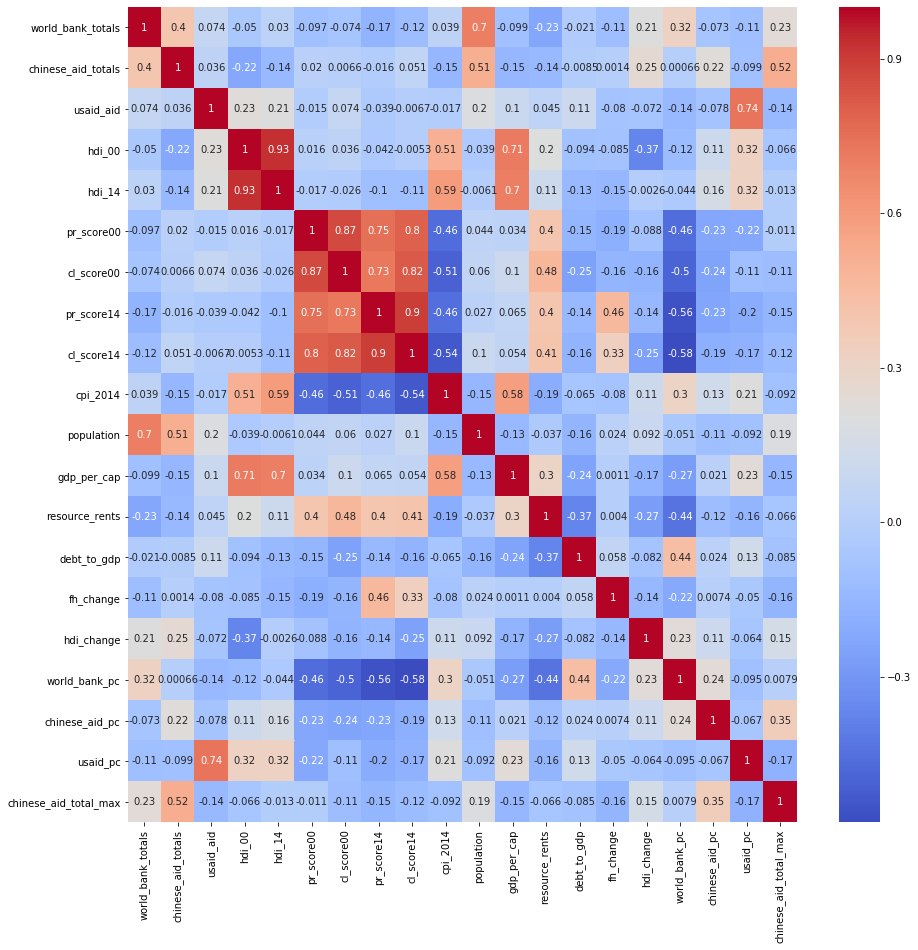

In [1160]:
# Showing the correlations between my variables 
plt.figure(figsize=(15, 15))
sns.heatmap(aid.corr(), 
            cmap='coolwarm', 
            annot=True)

In [1161]:
# Saving my data to a csv 
aid.to_csv('./aid_data/combined_data/aid_sums.csv', index=False)

In [1162]:
# Seeing the distribution of the per capita Chinese aid 
aid['chinese_aid_pc'].describe()

count       68.000000
mean       545.103600
std       1839.623801
min          0.000000
25%          9.684611
50%        104.863994
75%        334.653395
max      14666.984385
Name: chinese_aid_pc, dtype: float64

In [1163]:
# Seeing the distribution of the per capita World Bank aid 
aid['world_bank_pc'].describe()

count     68.000000
mean     103.382142
std      102.043905
min        0.000000
25%       18.535016
50%       92.715803
75%      148.667594
max      539.140106
Name: world_bank_pc, dtype: float64

In [1164]:
# Seeing the distribution of the per capita US aid 
aid['usaid_pc'].describe()

count       68.000000
mean       570.189345
std       1617.149385
min          0.677383
25%         87.053138
50%        182.222218
75%        407.586423
max      12421.839080
Name: usaid_pc, dtype: float64